In [ ]:
from google.colab import drive 
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# ***Sujet*** : **TUBERCULOSIS** **ANALYSIS** **USING** **TRANSFER** **LEARNING** **METHODS** 



In [ ]:
import os 

os.chdir("/content/drive/My Drive")

**Exploratory Analysis**

========> To begin this exploratory analysis, first import libraries and define functions for plotting the data using matplotlib. 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/My Drive/Train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Train/CHNCXR_0001_0.png
/content/drive/My Drive/Train/CHNCXR_0002_0.png
/content/drive/My Drive/Train/CHNCXR_0003_0.png
/content/drive/My Drive/Train/CHNCXR_0004_0.png
/content/drive/My Drive/Train/CHNCXR_0006_0.png
/content/drive/My Drive/Train/CHNCXR_0005_0.png
/content/drive/My Drive/Train/CHNCXR_0007_0.png
/content/drive/My Drive/Train/CHNCXR_0008_0.png
/content/drive/My Drive/Train/CHNCXR_0009_0.png
/content/drive/My Drive/Train/CHNCXR_0011_0.png
/content/drive/My Drive/Train/CHNCXR_0010_0.png
/content/drive/My Drive/Train/CHNCXR_0013_0.png
/content/drive/My Drive/Train/CHNCXR_0014_0.png
/content/drive/My Drive/Train/CHNCXR_0015_0.png
/content/drive/My Drive/Train/CHNCXR_0012_0.png
/content/drive/My Drive/Train/CHNCXR_0018_0.png
/content/drive/My Drive/Train/CHNCXR_0017_0.png
/content/drive/My Drive/Train/CHNCXR_0016_0.png
/content/drive/My Drive/Train/CHNCXR_0021_0.png
/content/drive/My Drive/Train/CHNCXR_0020_0.png
/content/drive/My Drive/Train/CHNCXR_002

============> Now we are ready to read in the data and use the plotting functions to visualize the data.



In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# montgomery_metadata.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/drive/My Drive/shenzhen_metadata.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'montgomery_metadata.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 662 rows and 4 columns


============> Let's take a quick look at what the data looks like





In [ ]:
df1.head(10)

,study_id,sex,age,findings
0,CHNCXR_0001_0.png,Male,45,normal
1,CHNCXR_0002_0.png,Male,63,normal
2,CHNCXR_0003_0.png,Female,48,normal
3,CHNCXR_0004_0.png,Male,58,normal
4,CHNCXR_0005_0.png,Male,28,normal
5,CHNCXR_0006_0.png,Male,60,normal
6,CHNCXR_0007_0.png,Female,53,normal
7,CHNCXR_0008_0.png,Male,48,normal
8,CHNCXR_0009_0.png,Female,71,normal
9,CHNCXR_0010_0.png,Female,59,normal


============> Distribution graphs (histogram) of sampled columns:

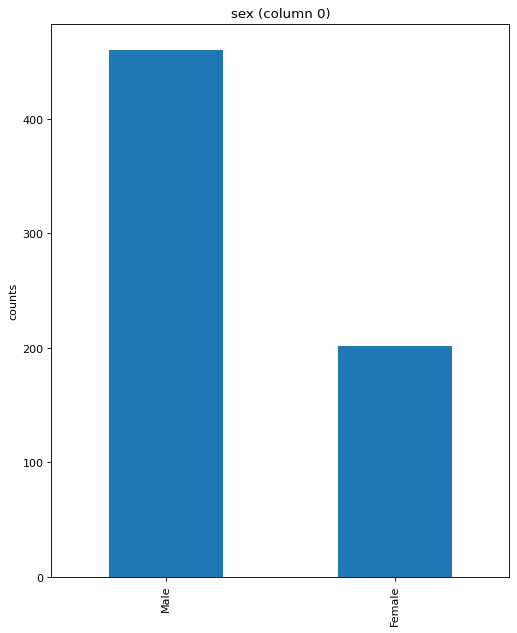

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

*The label is part of the file name.

----Example: CHNCXR_0470__1.png----

      0 = Normal (No TB)
      1 = TB




The numbr of images in each folder


In [ ]:
print(len(os.listdir('/content/drive/My Drive/Train/')))
print(len(os.listdir('/content/drive/My Drive/test/')))

426
134




Create a Dataframe containing all images



In [ ]:
# put the images into dataframes
shen_image_list = os.listdir('/content/drive/My Drive/Train/')
mont_image_list = os.listdir('/content/drive/My Drive/test/')

df_shen = pd.DataFrame(shen_image_list, columns=['study_id'])
df_mont = pd.DataFrame(mont_image_list, columns=['study_id'])


# remove the 'Thunbs.db' line
df_shen = df_shen[df_shen['study_id'] != 'Thumbs.db']
df_mont = df_mont[df_mont['study_id'] != 'Thumbs.db']

# Reset the index or this will cause an error later
df_shen.reset_index(inplace=True, drop=True)
df_mont.reset_index(inplace=True, drop=True)

print(df_shen.shape)
print(df_mont.shape)

(426, 1)
(134, 1)


In [ ]:
df_shen.head()


,study_id
0,CHNCXR_0001_0.png
1,CHNCXR_0002_0.png
2,CHNCXR_0003_0.png
3,CHNCXR_0004_0.png
4,CHNCXR_0006_0.png


In [ ]:
df_mont.head()

,study_id
0,CHNCXR_0262_0.png
1,CHNCXR_0263_0.png
2,CHNCXR_0261_0.png
3,CHNCXR_0266_0.png
4,CHNCXR_0265_0.png


======>  Assign labels to the images

In [ ]:
# select the 4th index from the end of the string
for x in shen_image_list:
 
  findings=int(x[-5])
  print(x) 
  if findings == 0:
    print ('Normal')
  if findings == 1:
    print ('Tuberculosis')   

CHNCXR_0001_0.png
Normal
CHNCXR_0002_0.png
Normal
CHNCXR_0003_0.png
Normal
CHNCXR_0004_0.png
Normal
CHNCXR_0006_0.png
Normal
CHNCXR_0005_0.png
Normal
CHNCXR_0007_0.png
Normal
CHNCXR_0008_0.png
Normal
CHNCXR_0009_0.png
Normal
CHNCXR_0011_0.png
Normal
CHNCXR_0010_0.png
Normal
CHNCXR_0013_0.png
Normal
CHNCXR_0014_0.png
Normal
CHNCXR_0015_0.png
Normal
CHNCXR_0012_0.png
Normal
CHNCXR_0018_0.png
Normal
CHNCXR_0017_0.png
Normal
CHNCXR_0016_0.png
Normal
CHNCXR_0021_0.png
Normal
CHNCXR_0020_0.png
Normal
CHNCXR_0022_0.png
Normal
CHNCXR_0019_0.png
Normal
CHNCXR_0024_0.png
Normal
CHNCXR_0023_0.png
Normal
CHNCXR_0026_0.png
Normal
CHNCXR_0028_0.png
Normal
CHNCXR_0027_0.png
Normal
CHNCXR_0029_0.png
Normal
CHNCXR_0032_0.png
Normal
CHNCXR_0033_0.png
Normal
CHNCXR_0030_0.png
Normal
CHNCXR_0031_0.png
Normal
CHNCXR_0035_0.png
Normal
CHNCXR_0034_0.png
Normal
CHNCXR_0044_0.png
Normal
CHNCXR_0043_0.png
Normal
CHNCXR_0042_0.png
Normal
CHNCXR_0041_0.png
Normal
CHNCXR_0046_0.png
Normal
CHNCXR_0048_0.png
Normal


IndexError: ignored

In [ ]:
#to load it
import pickle as pkl
with open("/content/drive/My Drive/train.pkl", "rb") as f:
    X_train, Y_train = pkl.load(f)
X_train
    

array([[[[0.0492272 ],
         [0.02306469],
         [0.02631257],
         ...,
         [0.05622653],
         [0.069732  ],
         [0.07262129]],

        [[0.0540808 ],
         [0.02418701],
         [0.02636204],
         ...,
         [0.05398468],
         [0.06696221],
         [0.07179514]],

        [[0.05133043],
         [0.02313898],
         [0.02308686],
         ...,
         [0.04623539],
         [0.05722574],
         [0.06367157]],

        ...,

        [[0.00580512],
         [0.00472834],
         [0.00428676],
         ...,
         [0.02481772],
         [0.030382  ],
         [0.04782972]],

        [[0.02897353],
         [0.02960754],
         [0.02928763],
         ...,
         [0.09693356],
         [0.10482067],
         [0.1019292 ]],

        [[0.00298226],
         [0.00357669],
         [0.00377554],
         ...,
         [0.1592116 ],
         [0.16405104],
         [0.14425214]]],


       [[[0.09399997],
         [0.07447487],
         [0.06

In [ ]:
#to load it
import pickle as pkl
with open("/content/drive/My Drive/test.pkl", "rb") as f:
    X_test, Y_test = pkl.load(f)
X_test 


array([[[[0.15846634],
         [0.13891412],
         [0.1331314 ],
         ...,
         [0.21787952],
         [0.23655161],
         [0.21824494]],

        [[0.17494221],
         [0.14684716],
         [0.13827938],
         ...,
         [0.23932903],
         [0.25868237],
         [0.24137264]],

        [[0.1644627 ],
         [0.13464609],
         [0.12300818],
         ...,
         [0.22976676],
         [0.24645261],
         [0.2335032 ]],

        ...,

        [[0.1327242 ],
         [0.14914854],
         [0.14639679],
         ...,
         [0.15083347],
         [0.1720995 ],
         [0.21457896]],

        [[0.09166574],
         [0.11145653],
         [0.10985265],
         ...,
         [0.25371212],
         [0.27302676],
         [0.2699965 ]],

        [[0.00269352],
         [0.00367553],
         [0.00370288],
         ...,
         [0.29711366],
         [0.30974945],
         [0.27745768]]],


       [[[0.09405424],
         [0.08653174],
         [0.07

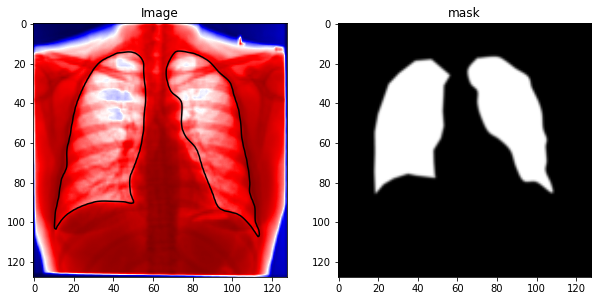

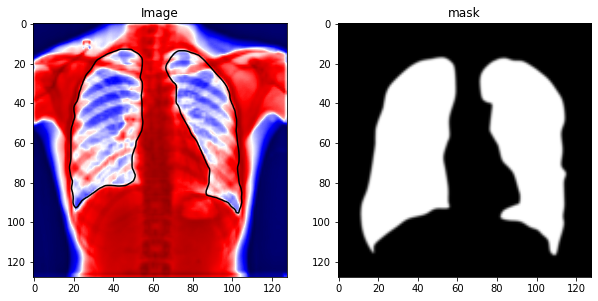

In [ ]:
import random
#random sample of training data image and mask
ix = random.randint(100, len(X_test))
has_mask = Y_train[ix].max() > 0

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X_train[ix, ..., 0], cmap='seismic', interpolation='bilinear')
if has_mask:
    ax[0].contour(Y_train[ix].squeeze(), colors='k', levels=[0.5])
ax[0].set_title('Image')
ax[1].imshow(Y_test[ix].squeeze(), interpolation='bilinear', cmap='gray')
ax[1].set_title('mask');


#random sample of training data image and mask
ix = random.randint(100, len(X_test))
has_mask = Y_train[ix].max() > 0

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X_train[ix, ..., 0], cmap='seismic', interpolation='bilinear')
if has_mask:
    ax[0].contour(Y_train[ix].squeeze(), colors='k', levels=[0.5])
ax[0].set_title('Image')
ax[1].imshow(Y_test[ix].squeeze(), interpolation='bilinear', cmap='gray')
ax[1].set_title('mask');

In [ ]:
df_shen = pd.DataFrame(shen_image_list, columns=['findings'])
df_shen['findings'].value_counts()

CHNCXR_0382_1.png    1
CHNCXR_0576_1.png    1
CHNCXR_0542_1.png    1
CHNCXR_0416_1.png    1
CHNCXR_0160_0.png    1
                    ..
CHNCXR_0387_1.png    1
CHNCXR_0095_0.png    1
CHNCXR_0029_0.png    1
CHNCXR_0086_0.png    1
CHNCXR_0549_1.png    1
Name: findings, Length: 426, dtype: int64